In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/405957090_5천만건(hum,voc포함).csv')
df

,_id,device_id,days,sex,temperature,humidity,voc,updated
0,405957090,357,408,0,2803,3657,7057,2023-11-13 16:02:43.000
1,405957089,357,408,0,2802,3655,6995,2023-11-13 16:02:42.000
2,405957088,357,408,0,2803,3655,7017,2023-11-13 16:02:41.000
3,405957087,357,408,0,2803,3654,6942,2023-11-13 16:02:40.000
4,405957086,357,408,0,2802,3654,7004,2023-11-13 16:02:39.000
...,...,...,...,...,...,...,...,...
49999995,355907295,2489,249,0,3188,4879,0,2023-05-08 07:55:17.000
49999996,355907294,2489,249,0,3189,4878,0,2023-05-08 07:55:16.000
49999997,355907293,2489,249,0,3188,4879,0,2023-05-08 07:55:15.000
49999998,355907292,2489,249,0,3189,4879,0,2023-05-08 07:55:14.000


In [2]:
df['_id'] = df['_id'].astype('Int32')
df['device_id'] = df['device_id'].astype('Int32')
df['days'] = df['days'].astype('Int32')
df['sex'] = df['sex'].astype('Int32')
df['temperature'] = df['temperature'].astype('Int32')
df['humidity'] = df['humidity'].astype('Int32')
df['voc'] = df['voc'].astype('Int32')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   _id          Int32 
 1   device_id    Int32 
 2   days         Int32 
 3   sex          Int32 
 4   temperature  Int32 
 5   humidity     Int32 
 6   voc          Int32 
 7   updated      object
dtypes: Int32(7), object(1)
memory usage: 2.0+ GB


In [4]:
# -1이 있는 행을 삭제
df = df.replace(-1, np.nan)  # -1을 NaN으로 변경
df = df.dropna()  # NaN이 있는 행 삭제

# 온도가 1500 이상 4500 이하인 데이터만 선택
df = df[(df['temperature'] >= 1500) & (df['temperature'] <= 4500)]
df = df[(df['days']>0) & (df['days']<=1800)]

### 1. 데이터 파싱

In [5]:
df_600 = df[df['days']<=600]
df_1800 = df[df['days']>600]

# 4만 이내, 선형
d1=[2179,1766,2220,1970,1702,2411,357,2552,1946,2273,1416]
# 튀는거
d2=[2290,2410,2547,2372,2542,2345,2546,2373,2372,2357,2358]
# 열이랑 습도와 같이 다시 봐야하는 디바이스
d3=[2532,1693,1908,2256,2340]

df_600_1 = df_600[df_600['device_id'].isin(d1)]
df_600_2 = df_600[df_600['device_id'].isin(d2)]

df_1800_1 = df_1800[df_1800['device_id'].isin(d1)]
df_1800_2 = df_1800[df_1800['device_id'].isin(d2)]

df_list = [df_600_1, df_600_2, df_1800_1, df_1800_2]

In [6]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

scale_list = []

for _df in df_list:
    scale = MinMaxScaler()
    scale_data = scale.fit_transform(_df[['temperature','humidity','voc']])

    result = pd.DataFrame(scale_data, columns=['temperature','humidity','voc'])
    scale_list.append(result)

### 2. pca 분석

In [7]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# for _df in df_list:
#     pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
#     printcipalComponents = pca.fit_transform(_df[["temperature","humidity","voc"]])
#     _df['pca'] = printcipalComponents


### 3. 군집분석

In [8]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# all_result = []

# for _df in df_list:

#     ks = range(1,10)
#     inertias = []

#     for k in ks:
#         model = KMeans(n_clusters=k)
#         model.fit(_df[['pca']])
#         inertias.append(model.inertia_)

#     # Plot ks vs inertias
#     plt.figure(figsize=(4, 4))

#     plt.plot(ks, inertias, '-o')
#     plt.xlabel('number of clusters, k')
#     plt.ylabel('inertia')
#     plt.xticks(ks)
#     plt.show()

#     all_result.appned(inertias)

In [9]:
from sklearn.cluster import KMeans


for scale, df in zip(scale_list, df_list):

    # K-Means 모델과 군집 예측값을 생성

    # 클러스터 모델 생성 파라미터는 원할 경우 추가
    clust_model = KMeans(n_clusters = 4 # 클러스터 개수
    #                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
    #                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
    #                      , random_state = 42
    #                      , algorithm='auto'
                        )

    # 생성한 모델로 데이터를 학습시킴
    clust_model.fit(scale) # unsupervised learning 

    # 결과 값을 변수에 저장
    centers = clust_model.cluster_centers_ # 각 군집의 중심점
    pred = clust_model.predict(scale) # 각 예측군집

    df['pred'] = pred

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\a\AppData\Local\Temp\ipykernel_13392\4229120220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = pred
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\a\AppData\Local\Temp\ipykernel_13392\4229120220.py:23: 

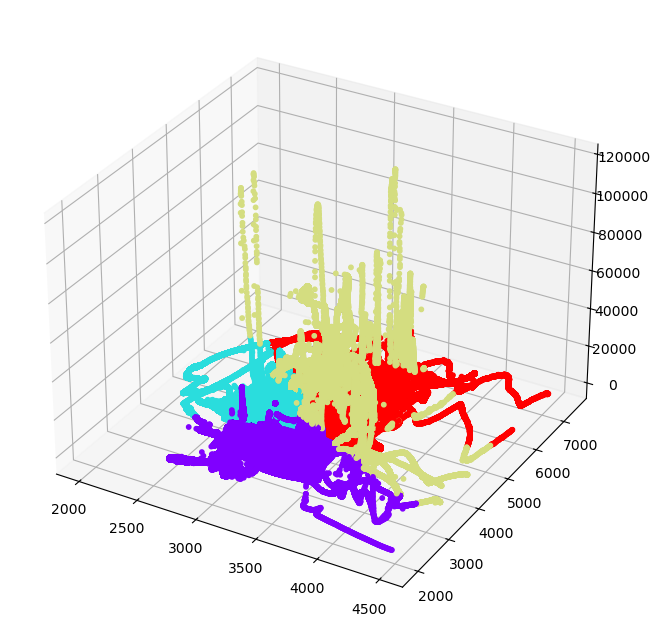

In [14]:
import matplotlib.pyplot as plt

# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터 scatterplot
ax.scatter(  np.array(df_600_1['temperature'])
           , np.array(df_600_1['humidity'])
           , np.array(df_600_1['voc'])
           , c = np.array(df_600_1['pred'])
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# # 축 레이블 추가
# ax.set_xlabel('temperature')
# ax.set_ylabel('humidity')ddddddbv                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# ax.set_zlabel('voc')

plt.show()

In [13]:
df_600_1['pred'].value_counts()

pred
1    2216051
3    1956826
0     743301
2     259708
Name: count, dtype: int64